In [1]:
from collections import OrderedDict
import dash
#import dash_core_components as dcc
from dash import dcc
#import dash_html_components as html
from dash import html
from dash.dependencies import Input, Output, State, ClientsideFunction
#import dash_core_components as dcc
from dash import dcc
import plotly.express as px
import plotly.graph_objects as go
import  plotly as py
#import pandas as pd
import sys
import numpy as np
import os
import geopandas as gpd
import pandas as pd
#from dask import dataframe as dd
import plotly.express as px
import  plotly as py
from plotly.subplots import make_subplots
import os
from pyproj import Transformer
from shapely.geometry import Point
import math
import random
from datetime import datetime, date, timedelta, time
import queue
import threading
import time
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error
#import vaex

In [2]:
print(os.getcwd())
ZIPS = ['33510', '33511', '33527', '33534', '33547', '33548', '33549', '33556', '33558', '33559', '33563', '33565',
            '33566', '33567', '33569', '33570', '33572', '33573', '33578', '33579', '33584', '33592', '33594', '33596',
            '33598', '33602', '33603', '33604', '33605', '33606', '33607', '33609', '33610', '33611', '33612', '33613',
            '33614', '33615', '33616', '33617', '33618', '33619', '33624', '33625', '33626', '33629', '33634', '33635',
            '33637', '33647',
            '33620', '33503']

c:\Users\sookim\Documents\abm-0301\ABM-dashboard


In [12]:

#path = os.path.join('..', 'ABM-simulator', 'SimulationEngine', 'output', '0308', 'run-no-intervention')
path = os.path.join('..', 'ABM-simulator', 'SimulationEngine', 'output', 'split-with-new-step')
print(path)

dlist = []
for root, dirs, files in os.walk(path):
#for root, dirs, files in os.walk(path2):
    for file in files:
        if file.startswith("plot_"):
            #print(file)
            no = file.split('_')[1].split('.')[0]
            #print(no)
            d = pd.read_csv(os.path.join(root, file))
            dlist.append(d)

print('All plots-Loading completed!')
plotdf = pd.concat(dlist, axis=1)
df1=plotdf
#df1.plot()
#df1['vcases'].head(150)
df1[['vcases', 'vadmissions', 'vdeaths']]

..\ABM-simulator\SimulationEngine\output\split-with-new-step
All plots-Loading completed!


vcases  vcases  vcases  vcases  vcases  vcases  vcases  vcases  vcases  \
0       NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN   
1       NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN   
2       NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN   
3       NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN   
4       NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN   
..      ...     ...     ...     ...     ...     ...     ...     ...     ...   
696  1563.0  1563.0  1563.0  1563.0  1563.0  1563.0  1563.0  1563.0  1563.0   
697  2171.0  2171.0  2171.0  2171.0  2171.0  2171.0  2171.0  2171.0  2171.0   
698  1412.0  1412.0  1412.0  1412.0  1412.0  1412.0  1412.0  1412.0  1412.0   
699  1309.0  1309.0  1309.0  1309.0  1309.0  1309.0  1309.0  1309.0  1309.0   
700  1165.0  1165.0  1165.0  1165.0  1165.0  1165.0  1165.0  1165.0  1165.0   

     vcases  ...  vdeaths  vdeaths  vdeaths  vdeaths  vdeaths  vdeaths  \
0       NaN  ...      NaN      NaN      NaN      NaN      NaN      NaN   
1       NaN  ...      NaN      NaN      NaN      NaN      NaN      NaN   
2       NaN  ...      NaN      NaN      NaN      NaN      NaN      NaN   
3       NaN  ...      NaN      NaN      NaN      NaN      NaN      NaN   
4       NaN  ...      NaN      NaN      NaN      NaN      NaN      NaN   
..      ...  ...      ...      ...      ...      ...      ...      ...   
696  1563.0  ...     15.0     15.0     15.0     15.0     15.0     15.0   
697  2171.0  ...     13.0     13.0     13.0     13.0     13.0     13.0   
698  1412.0  ...     11.0     11.0     11.0     11.0     11.0     11.0   
699  1309.0  ...      9.0      9.0      9.0      9.0      9.0      9.0   
700  1165.0  ...      7.0      7.0      7.0      7.0      7.0      7.0   

     vdeaths  vdeaths  vdeaths  vdeaths  
0        NaN      NaN      NaN      NaN  
1        NaN      NaN      NaN      NaN  
2        NaN      NaN      NaN      NaN  
3        NaN      NaN      NaN      NaN  
4        NaN      NaN      NaN      NaN  
..       ...      ...      ...      ...  
696     15.0     15.0     15.0     15.0  
697     13.0     13.0     13.0     13.0  
698     11.0     11.0     11.0     11.0  
699      9.0      9.0      9.0      9.0  
700      7.0      7.0      7.0      7.0  

[701 rows x 150 columns]

In [10]:
import numbers

df2=plotdf.transpose()
df2 = df2.groupby(by=df2.index, axis=0).apply(lambda g: g.mean() if isinstance(g.iloc[0,0], numbers.Number) else g.iloc[0])
mean = df2.transpose()

In [11]:
mean[['vcases', 'vadmissions', 'vdeaths']]

vcases vadmissions vdeaths
0       NaN         NaN     NaN
1       NaN         NaN     NaN
2       NaN         NaN     NaN
3       NaN         NaN     NaN
4       NaN         NaN     NaN
..      ...         ...     ...
696  1563.0         0.0    15.0
697  2171.0       557.0    13.0
698  1412.0         0.0    11.0
699  1309.0         0.0     9.0
700  1165.0         0.0     7.0

[701 rows x 3 columns]

In [ ]:
plotdf.drop('date', axis=1, inplace=True)
dates=dlist[0]['date'].tolist()
plotdf['date']=dates
plotdf

<AxesSubplot:>

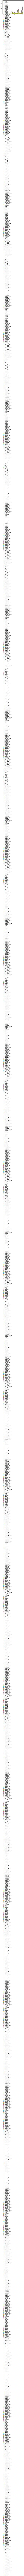

In [6]:
plotdf.plot()

In [ ]:
import numbers

max = plotdf.groupby(plotdf.columns, axis=1).max()
min = plotdf.groupby(plotdf.columns, axis=1).min()
sum = plotdf.groupby(plotdf.columns, axis=1).sum()
#mean = plotdf.groupby(plotdf.columns, axis=1).mean() # error! return 0s ... use transpose() for fix

# df2=plotdf.transpose()
# df2 = df2.groupby(by=df2.index, axis=0).apply(lambda g: g.mean() if isinstance(g.iloc[0,0], numbers.Number) else g.iloc[0])
# mean = df2.transpose()        
# mean
plotdf=sum

In [ ]:
plotdf['Date'] = pd.to_datetime(plotdf['date'])
#plotdf['Week_Number'] = plotdf['Date'].dt.week
plotdf['Week_Number'] = plotdf['Date'].dt.isocalendar().week
#plotdf['Year'] = plotdf['Date'].dt.year
plotdf['Year']=(plotdf['Date'] - plotdf['Date'].dt.weekday * timedelta(days=1)).dt.year
plotdf['year_week2']=plotdf['Year'].astype(int)*100+plotdf['Week_Number'].astype(int)
plotdf['date'] = pd.to_datetime(plotdf['year_week2'].astype(str) + '0', format='%Y%W%w') # do not use: last week of the year become weird...


plotdf.set_index('Date')
plotdf

In [ ]:
plotdf[plotdf['Week_Number']==52]

In [ ]:
df2 = sum.groupby(['Year','Week_Number'], as_index=False).sum()
#df2 = sum.groupby(['Year','Week_Number']).sum().reset_index()
df2['year_week2']=df2['Year'].astype(int)*100+df2['Week_Number'].astype(int)
df2['date'] = pd.to_datetime(df2['year_week2'].astype(str) + '0', format='%Y%W%w')
plotdf[plotdf['Week_Number']==52]

In [ ]:
df2[['cases', 'vcases']].plot()

In [ ]:
#sf=df2['cases'].quantile([0.25])
df2['cases2']=df2['cases']*20
df2[['cases2','vcases']].plot()

In [ ]:
df2['admissions2']=df2['admissions']*22
df2[['admissions2', 'vadmissions']].plot()

In [ ]:
df2['death2']=df2['deaths']*100
df2[['death2','vdeaths']].plot()

In [ ]:
df2['percent_change']=df2['cases'].pct_change()
df2['percent_change']
df2[['percent_change']].plot()